### Prepare data

In [27]:
import mne

data_path = r"data\first_try\hania\hania_real_movement_1_annotated.fif"
is_real_movement = "real" in data_path.lower()
recording_type = "real_movement" if is_real_movement else "motor_imagery"

raw = mne.io.read_raw_fif(data_path, preload=True)
eeg_channels = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
raw.pick(picks=eeg_channels)
raw.resample(sfreq=250)
raw.filter(l_freq=1.0, h_freq=40.0, fir_design='firwin')
raw.notch_filter(freqs=[50.0])

mateusz_mapping = {
    'A1': 'Fp1',
    'A2': 'Fp2',
    'A3': 'F4',
    'A4': 'Fz',
    'A5': 'F3',
    'A6': 'T7',
    'A7': 'C3',
    'A8': 'Cz',
    'A9': 'C4',
    'A10': 'T8',
    'A11': 'P4',
    'A12': 'Pz',
    'A13': 'P3',
    'A14': 'O1',
    'A15': 'Oz',
    'A16': 'O2'
}

hania_mapping = {
    'A1': 'Fp1',
    'A2': 'Fp2',
    'A3': 'F4',
    'A4': 'Fz',
    'A5': 'F3',
    'A6': 'CP1', # modified
    'A7': 'C3', 
    'A8': 'Cz',
    'A9': 'C4',
    'A10': 'CP2', # modified
    'A11': 'P4',
    'A12': 'Pz',
    'A13': 'P3',
    'A14': 'FC1', # modified
    'A15': 'CPz', # modified // not sure if this is exactly correct
    'A16': 'FC2' # modified
}

raw.rename_channels(hania_mapping)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)


Opening raw data file data\first_try\hania\hania_real_movement_1_annotated.fif...
Isotrak not found
    Range : 0 ... 503807 =      0.000 ...   246.000 secs
Ready.
Reading 0 ... 503807  =      0.000 ...   246.000 secs...


C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_6460\3003927189.py:7: RuntimeWarning: This filename (data\first_try\hania\hania_real_movement_1_annotated.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

<Raw | hania_real_movement_1_annotated.fif, 16 x 61500 (246.0 s), ~7.5 MiB, data loaded>

### Show annotations

In [28]:
all_events, all_events_id = mne.events_from_annotations(raw)
print(all_events)
print(all_events_id)

# rename event ids to more readable names
all_events_id = {'Both feets': 1, 'Both hands': 2, 'Left hand': 3, 'Relax': 4, 'Right hand': 5}


Used Annotations descriptions: ['BF', 'BH', 'LH', 'R', 'RH']
[[ 1156     0     4]
 [ 2520     0     3]
 [ 4973     0     4]
 [ 6191     0     5]
 [ 8660     0     4]
 [ 9965     0     2]
 [12391     0     4]
 [13781     0     1]
 [16113     0     4]
 [17383     0     3]
 [19637     0     4]
 [21059     0     5]
 [22445     0     4]
 [23688     0     2]
 [26137     0     4]
 [27355     0     1]
 [29836     0     4]
 [31227     0     3]
 [33633     0     4]
 [34930     0     5]
 [37340     0     4]
 [38688     0     2]
 [41070     0     4]
 [42418     0     1]
 [44852     0     4]
 [46137     0     3]
 [48559     0     4]
 [49906     0     5]
 [52348     0     4]
 [53750     0     2]
 [56043     0     4]
 [57355     0     1]
 [59965     0     4]]
{'BF': 1, 'BH': 2, 'LH': 3, 'R': 4, 'RH': 5}


### Epoch data
There is issue with varying epoch-time - in our data relax takes 5s, and other samples 10s. MNE does not support multiple epoch times.\
Simple fix is to drop relax for now - we can create second epoch object with epochtime=5.

Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 16 events and 2001 original time points ...
0 bad epochs dropped
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 17 events and 751 original time points ...
0 bad epochs dropped


C:\Users\Mateuusz\AppData\Local\Temp\ipykernel_6460\580347041.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


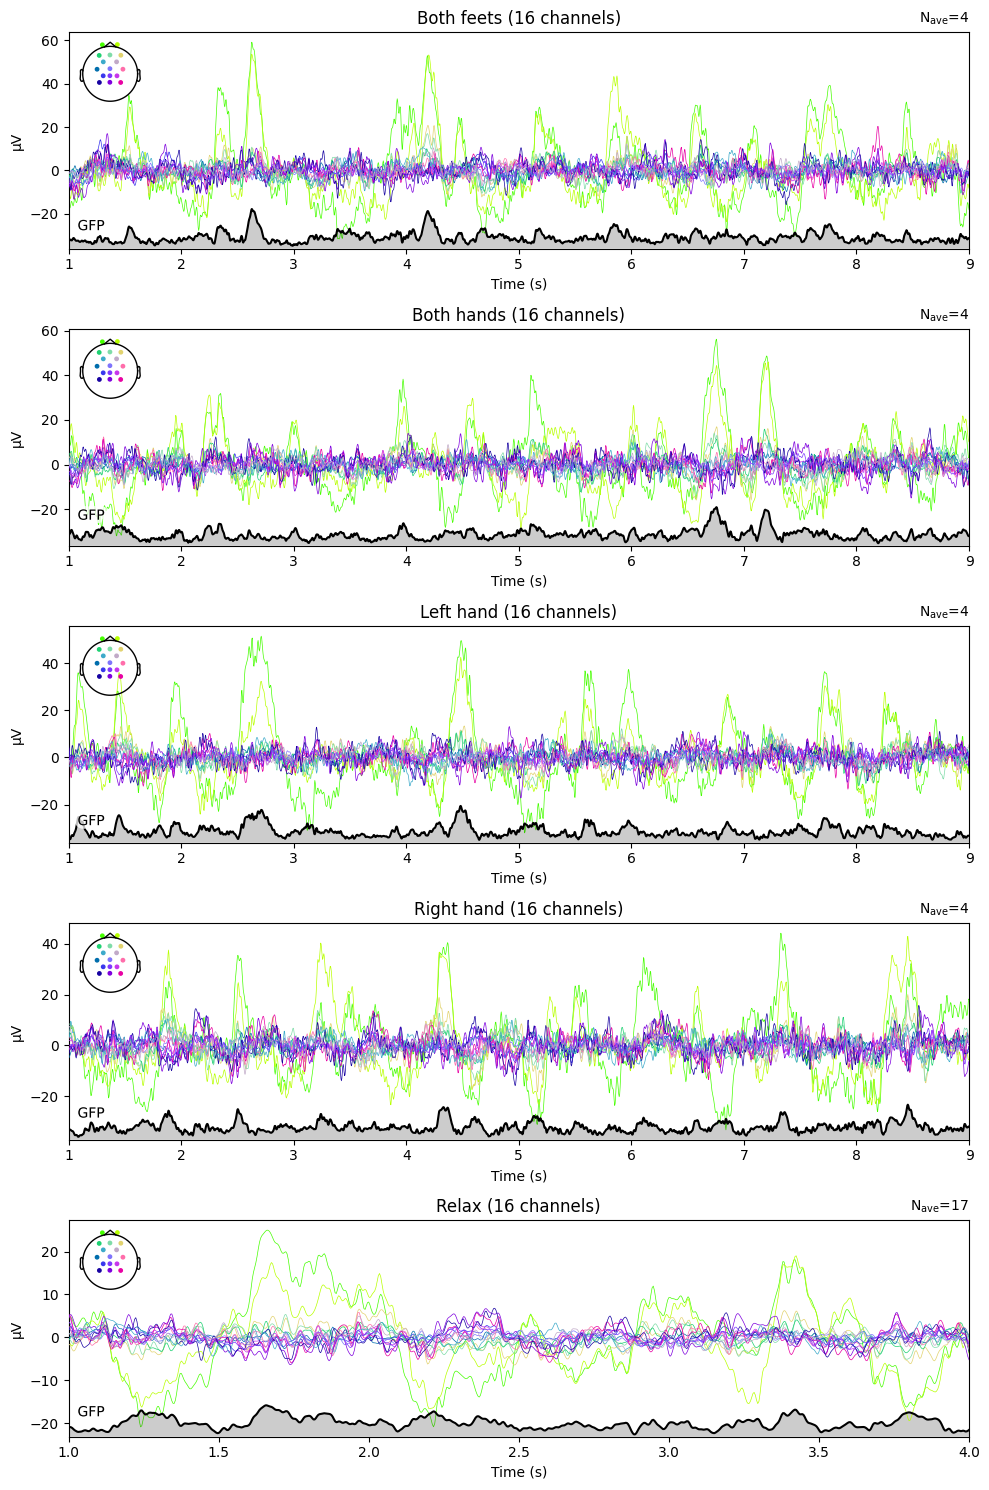

In [29]:
if 'Relax' in all_events_id:
    relax_event_id = {'Relax': all_events_id['Relax']}
    del all_events_id['Relax']

task_margin = 1.0 # seconds, margin to be sure that we are focused on the task
task_end = 9.0 # seconds, to have same length for all epochs
epochs = mne.Epochs(
    raw=raw,
    events=all_events,
    event_id=all_events_id,
    baseline=None,
    tmin=task_margin,
    tmax=task_end,
    preload=True
)

task_end = 4.0
relax_epochs = mne.Epochs(
    raw=raw,
    events=all_events,
    event_id=relax_event_id,
    baseline=None,
    tmin=task_margin,
    tmax=task_end,
    preload=True
)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(10, 15))

for i, event_id in enumerate(all_events_id):
    epochs[event_id].average().plot(gfp=True, spatial_colors=True, titles={"eeg": event_id}, axes=axes[i], show=False)

relax_epochs.average().plot(gfp=True, spatial_colors=True, titles={"eeg": "Relax"}, axes=axes[4], show=False)

plt.tight_layout()
plt.show()


### Plot topography of each band for each state

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


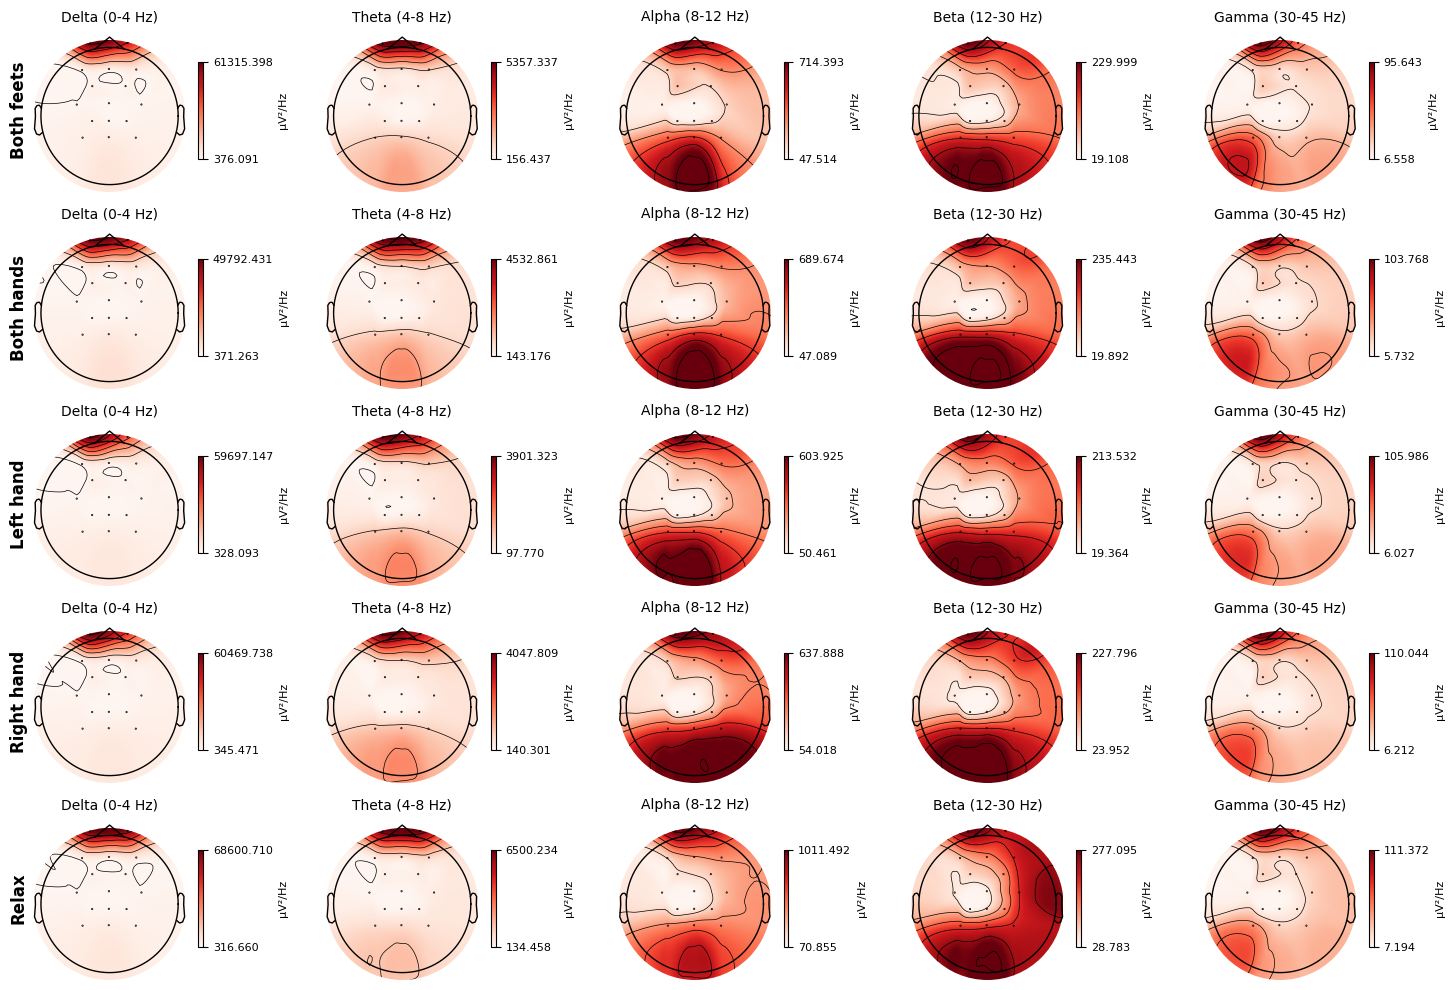

In [30]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))

for i, mode in enumerate(all_events_id):
    epochs[mode].compute_psd().plot_topomap(axes=axes[i], show=False)
    axes[i, 0].set_ylabel(mode, rotation=90, fontsize=12, fontweight='bold')

relax_epochs.compute_psd().plot_topomap(axes=axes[4], show=False)
axes[4, 0].set_ylabel('Relax', rotation=90, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


### Animate second epoch
For that, ffmpeg should be installed: https://www.ffmpeg.org/

Initializing animation...
end of saving [Both feets] animation
Initializing animation...
end of saving [Both hands] animation
Initializing animation...
end of saving [Left hand] animation
Initializing animation...
end of saving [Right hand] animation
Initializing animation...
Initializing animation...
Initializing animation...
Initializing animation...


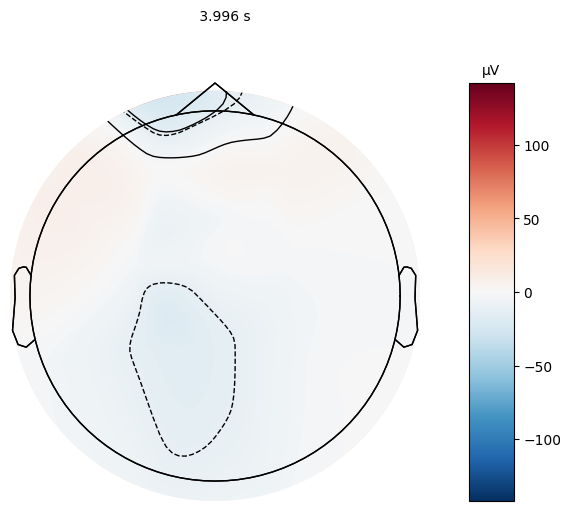

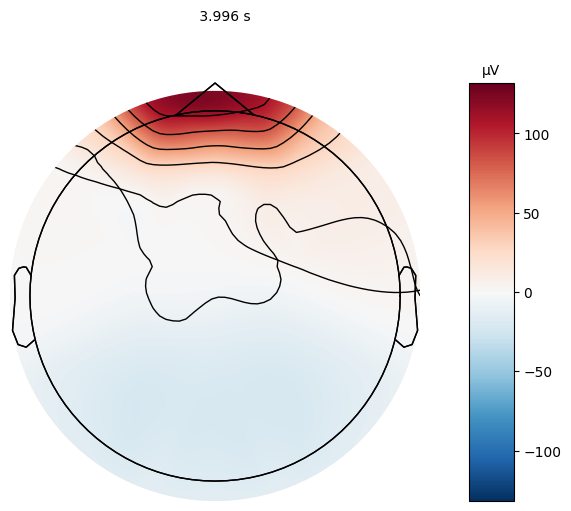

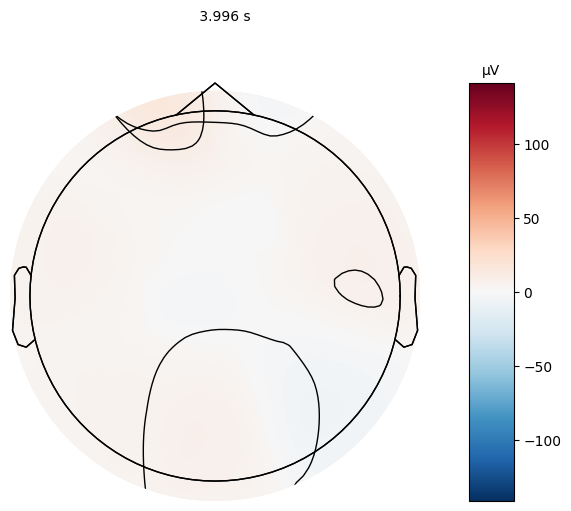

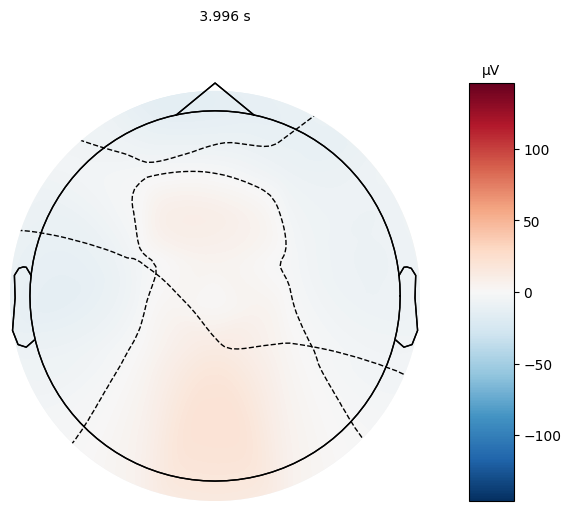

In [31]:
rec_time = task_end - task_margin
step = 0.004
slowdown = 20 # each frame will be displayed 20 times longer, 8 sec recording to 160 second animation
times = [v*step for v in range(int(task_margin/step), int(task_end/step))]
framerate = 1/(step*slowdown)
filenames = []
for mode in all_events_id:
    recording = epochs[mode][1].average()
    fig, anim = recording.animate_topomap(times=times, ch_type="eeg", frame_rate=framerate, blit=False, show=False)
    filename = f"visualisation_out/{recording_type}_{mode}.mp4"
    anim.save(filename=filename, writer="ffmpeg")
    filenames.append(filename)
    print(f"end of saving [{mode}] animation")


### Combine two videos together

In [32]:
import subprocess

def combine_videos(left_video_path, right_video_path, output_path):
    cmd = f'ffmpeg -i \"{left_video_path}\" -i \"{right_video_path}\" -filter_complex hstack \"{output_path}\"'
    subprocess.run(cmd, shell=True)

left_video = filenames[2]
right_video = filenames[3]
output_video = "visualisation_out/left_and_right_hand.mp4"

combine_videos(left_video, right_video, output_video)

### Show epoch's most active regions

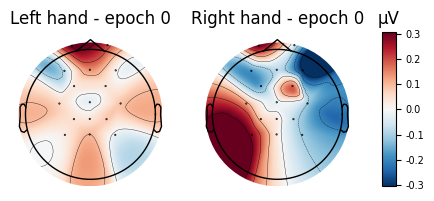

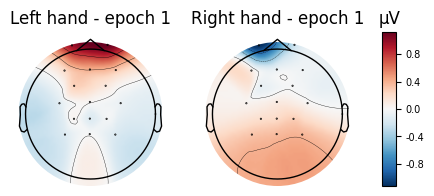

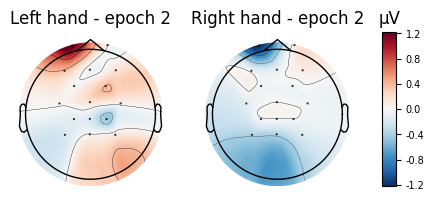

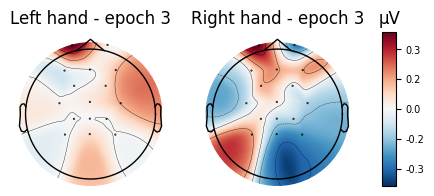

In [33]:
n_left = len(epochs['Left hand'])
n_right = len(epochs['Right hand'])
n_epochs = max(n_left, n_right)

for i in range(n_epochs):
    fig, axes = plt.subplots(1, 3, figsize=(5, 2), width_ratios=[12, 12, 1])
    for ax, mode in zip(axes, ['Left hand', 'Right hand']):
        evoked = epochs[mode][i].average()
        evoked.plot_topomap(times=5, ch_type='eeg', axes=[ax, axes[2]], show=False, average=8)
        ax.set_title(f"{mode} - epoch {i}")
    plt.show()

### Show record's most active regions

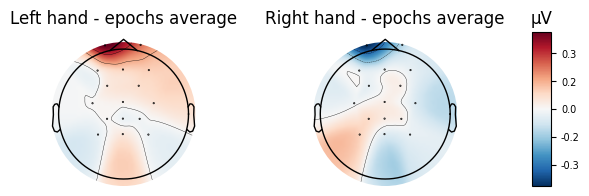

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2), width_ratios=[12, 12, 1])
recording = epochs[mode].average()
for ax, mode in zip(axes, ['Left hand', 'Right hand']):
    evoked = epochs[mode].average()
    evoked.plot_topomap(times=5, ch_type='eeg', axes=[ax, axes[2]], show=False, average=8)
    ax.set_title(f"{mode} - epochs average")

### Show step-by-step comparison

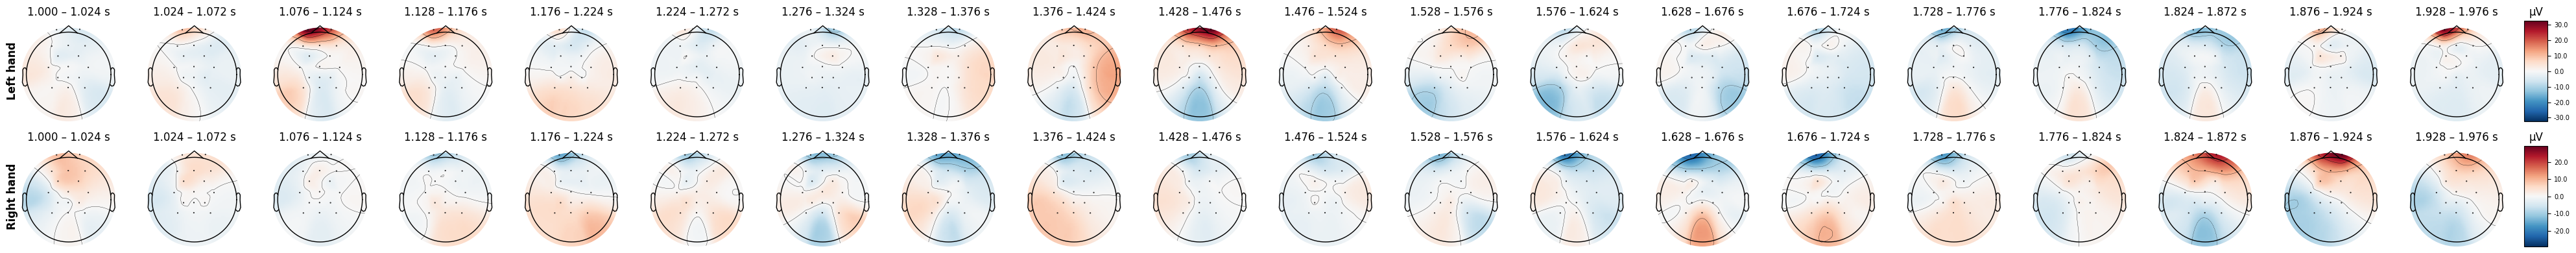

In [35]:
step = 0.05
times = [v * step for v in range(int(task_margin / step), int(2.0 / step))]  # up to 2 second, as blink happened after that in this recording and it distorts the scale
n_cols = len(times) + 1  # extra column for colorbar
fig2, axes2 = plt.subplots(2, n_cols, figsize=(len(times) * 2, 4), width_ratios=[5] * len(times) + [1])
for i, mode_name in enumerate(['Left hand', 'Right hand']):
    evoked = epochs[mode_name].average()
    evoked.plot_topomap(times=times, ch_type="eeg", axes=axes2[i, :], show=False, average=step)
    axes2[i, 0].set_ylabel(mode_name, rotation=90, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()